In [119]:
%matplotlib inline
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
%config InlineBackend.figure_format = 'retina'

In [120]:
df = pd.read_csv('/Users/boluogunle/Desktop/data.csv')
df.columns

Index(['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10', 'Q11',
       'Q12', 'Q13', 'Q14', 'Q15', 'Q16', 'Q17', 'Q18', 'Q19', 'Q20', 'Q21',
       'Q22', 'Q23', 'Q24', 'Q25', 'Q26', 'Q27', 'Q28', 'Q29', 'Q30', 'Q31',
       'Q32', 'Q33', 'Q34', 'Q35', 'Q36', 'age', 'gender', 'country'],
      dtype='object')

In [121]:
df.head()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,Q30,Q31,Q32,Q33,Q34,Q35,Q36,age,gender,country
0,1,5,5,5,1,5,1,5,1,5,...,5,5,5,5,5,5,5,32,2,US
1,1,1,5,1,1,1,1,1,1,1,...,5,5,5,5,1,5,5,35,1,US
2,1,5,5,5,3,5,1,5,1,5,...,4,4,4,4,4,3,2,19,1,IL
3,4,5,1,4,5,5,5,1,1,3,...,3,2,4,4,5,4,3,32,1,US
4,4,5,3,4,4,4,3,4,2,2,...,5,4,4,5,5,5,4,27,1,IE


In [323]:
new_df = df[["Q4","Q8",'Q14','Q18',"Q21","Q30","Q36","age","gender","country"]]

In [324]:
new_df.head()

,Q4,Q8,Q14,Q18,Q21,Q30,Q36,age,gender,country
0,5,5,2,5,1,5,5,32,2,US
1,1,1,1,1,1,5,5,35,1,US
2,5,5,5,5,2,4,2,19,1,IL
3,4,1,4,3,5,3,3,32,1,US
4,4,4,4,4,3,5,4,27,1,IE


In [325]:
new_df = new_df[df.age <= 100]

In [326]:
len(df)

51491

In [327]:
len(new_df)

51471

In [328]:
print(df.shape)

(51491, 39)


In [329]:
print(new_df.shape)

(51471, 10)


In [330]:
print(new_df.columns)

Index(['Q4', 'Q8', 'Q14', 'Q18', 'Q21', 'Q30', 'Q36', 'age', 'gender',
       'country'],
      dtype='object')


In [331]:
print(new_df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51471 entries, 0 to 51490
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Q4       51471 non-null  int64 
 1   Q8       51471 non-null  int64 
 2   Q14      51471 non-null  int64 
 3   Q18      51471 non-null  int64 
 4   Q21      51471 non-null  int64 
 5   Q30      51471 non-null  int64 
 6   Q36      51471 non-null  int64 
 7   age      51471 non-null  int64 
 8   gender   51471 non-null  int64 
 9   country  51464 non-null  object
dtypes: int64(9), object(1)
memory usage: 4.3+ MB
None


In [332]:
new_df.describe()

,Q4,Q8,Q14,Q18,Q21,Q30,Q36,age,gender
count,51471.000000,51471.000000,51471.000000,51471.000000,51471.000000,51471.000000,51471.000000,51471.000000,51471.000000
mean,3.395640,3.243224,3.237260,3.413942,3.199530,3.197218,2.564240,27.334091,1.692545
std,1.239474,1.265234,1.418744,1.298297,1.285818,1.216053,1.207091,11.682734,0.488920
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,13.000000,0.000000
25%,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,19.000000,1.000000
50%,4.000000,3.000000,4.000000,4.000000,3.000000,3.000000,2.000000,23.000000,2.000000
75%,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,33.000000,2.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,100.000000,3.000000


In [333]:
# The above dataset shows that on average people neither agree nor disagree with majority
# of the questions they were asked
# The average age of people taking part in the survey are 27 year olds

In [334]:
new_df.describe(include=['object', 'bool'])

,country
count,51464
unique,177
top,US
freq,27873


In [335]:
# Which sex worries about losing their partner the most ? (Q8)

In [336]:
sex_Q8 = new_df[['Q8', 'gender']]
sex_Q8.head(20)

,Q8,gender
0,5,2
1,1,1
2,5,1
3,1,1
4,4,1
5,3,1
6,4,1
7,3,2
8,4,2
9,3,1


In [337]:
# this shows that majority of people are indifferent/ don't worry about losing their partner
# this shows that a small handful of the majority agree and do worry about losing their partner

In [338]:
age_Q8 = new_df[['Q8', 'age']]
age_Q8.head(20)

,Q8,age
0,5,32
1,1,35
2,5,19
3,1,32
4,4,27
5,3,18
6,4,46
7,3,51
8,4,55
9,3,24


In [339]:
# The above data frame shows that the amount of people that are indifferent are equal to the amount of people that
# worry about losing their partner

In [340]:
new_df["gender"].value_counts()

2    34884
1    15915
3      478
0      194
Name: gender, dtype: int64

In [341]:
# The above indicates that more women took part in the survey and could possibly indicate that they
# are more willing to talk about their relationships/feelings than men or other genders

In [342]:
sex_Q8["Q8"].value_counts()

4    16617
2    11238
3     9470
5     8908
1     5038
0      200
Name: Q8, dtype: int64

In [343]:
# The above shows that more than half of the dataset worry about losing their partners

In [344]:
new_df.isnull().sum()

Q4         0
Q8         0
Q14        0
Q18        0
Q21        0
Q30        0
Q36        0
age        0
gender     0
country    7
dtype: int64

In [345]:
new_df['country'].fillna('country', inplace = True)

/Users/boluogunle/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


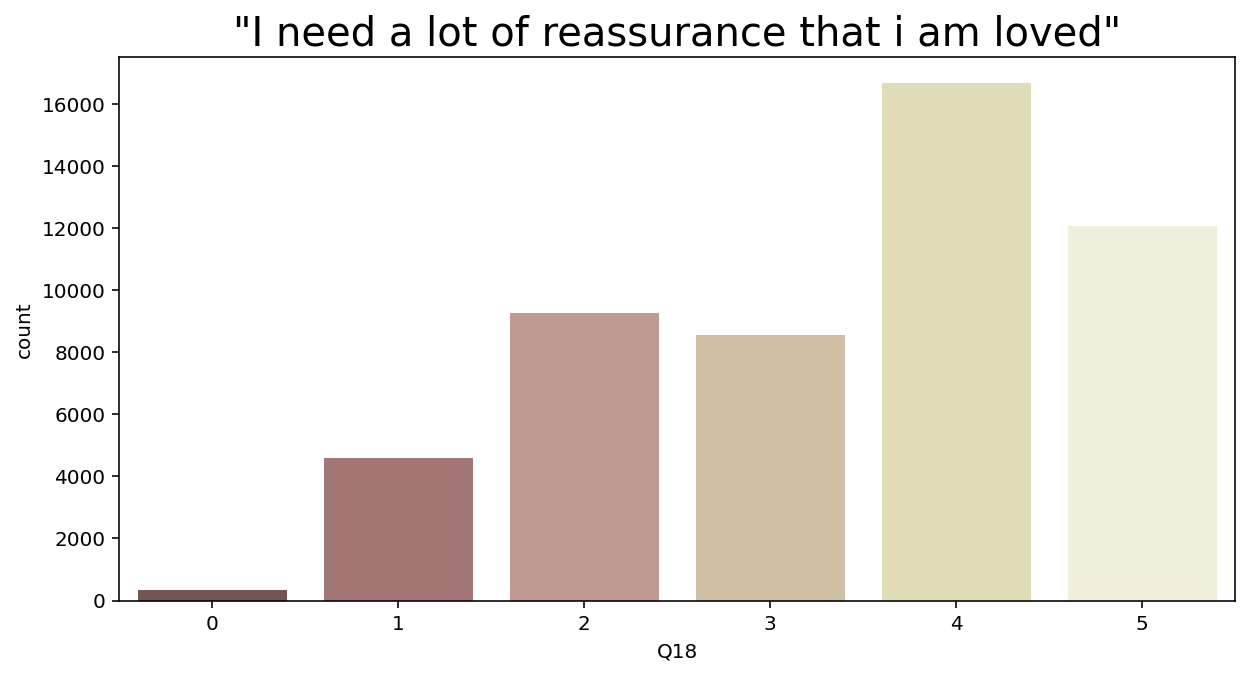

In [346]:
plt.rcParams['figure.figsize'] = (10, 5)
sns.countplot(new_df['Q18'], palette = 'pink')
plt.title('"I need a lot of reassurance that i am loved"', fontsize = 20)
plt.show()

In [347]:
# The above graph shows that over 16000 people agree that they need a lot of reassurance that they are loved
# Next in line is the 12000 people that agree that they are loved, this shows that over 28000 people 
# feel that they need assurance that they are loved.

In [348]:
# How many people in US, UK, China, EU, Nigeria and Kenya worry about being alone?

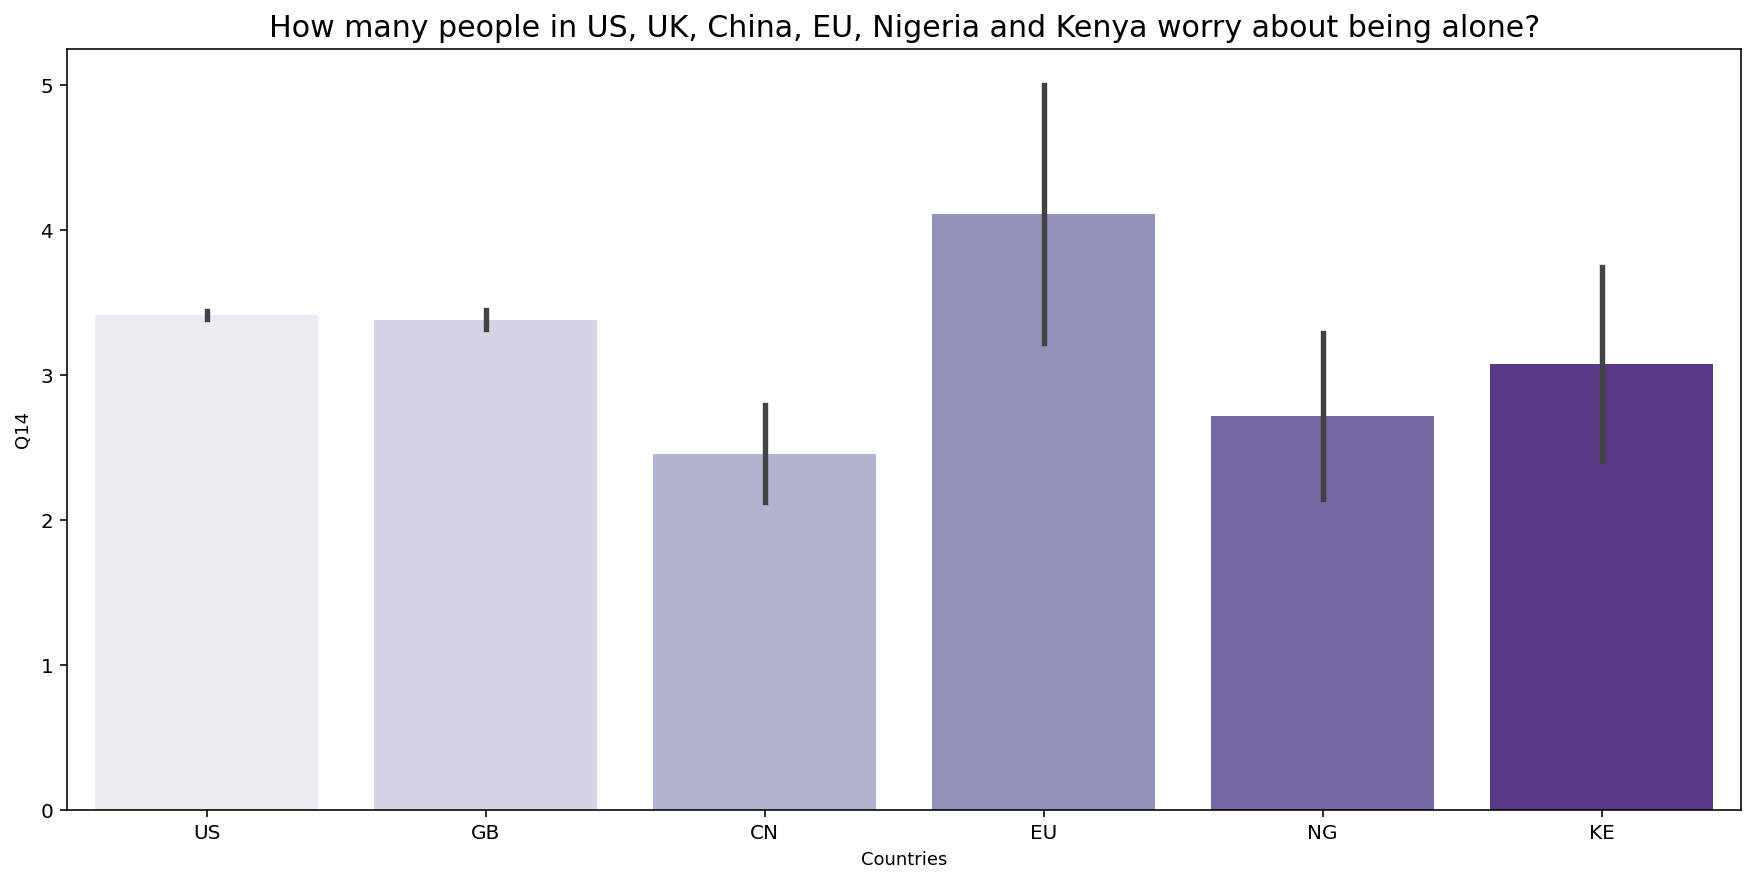

In [349]:
some_countries = ('GB', 'US','EU','NG', 'KE', 'CN')
data_countries = new_df.loc[new_df['country'].isin(some_countries) & new_df['Q14']]

plt.rcParams['figure.figsize'] = (15, 7)
ax = sns.barplot(x = data_countries['country'], y = data_countries['Q14'], palette = 'Purples')
ax.set_xlabel(xlabel = 'Countries', fontsize = 9)
ax.set_ylabel(ylabel = 'Q14', fontsize = 9)
ax.set_title(label = 'How many people in US, UK, China, EU, Nigeria and Kenya worry about being alone?', fontsize = 15)
plt.show()

In [350]:
# This shows that people in the EU worry agree that they worry about being alone
# China shows that they disagree with worrying about being alone 
# this might be inaccurate as Europe as a whole has a bigger landmass than the rest of the other countries
# and therefore a lot more people can attend the online survey
# Furthermore, countries such as nigeria and Kenya have significantly less access to the internet than other countries

/Users/boluogunle/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Q30', ylabel='Density'>

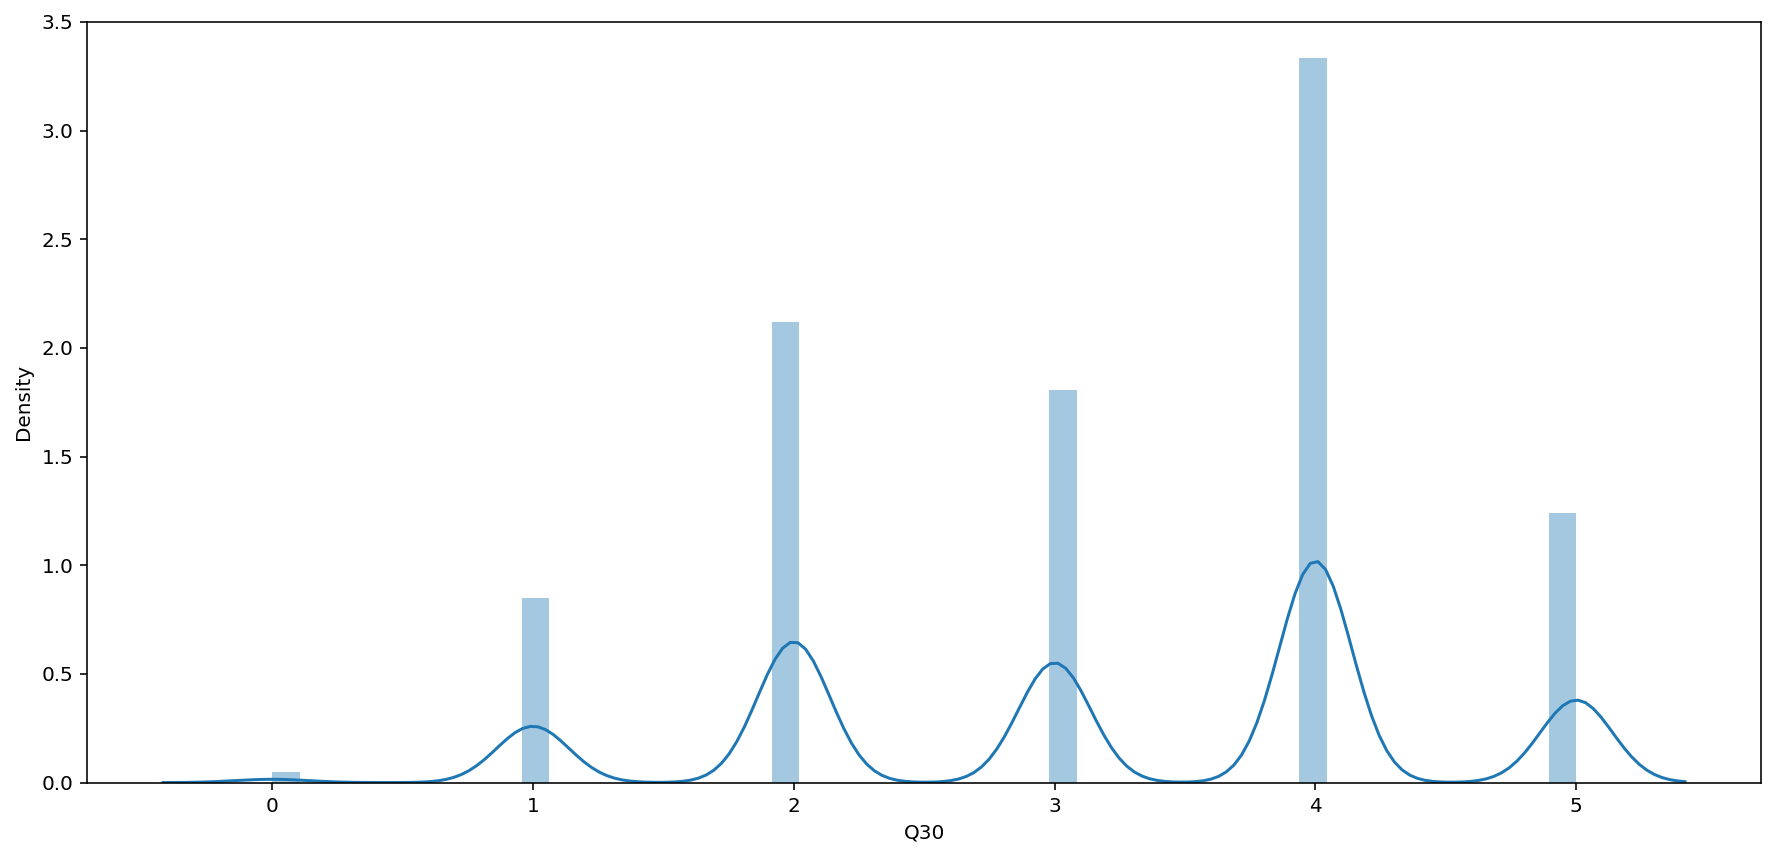

In [351]:
# most people aggree that they feel frustration when their partner is not around.
sns.distplot(new_df['Q30'])

In [352]:
new_df['Q30'].describe()

count    51471.000000
mean         3.197218
std          1.216053
min          0.000000
25%          2.000000
50%          3.000000
75%          4.000000
max          5.000000
Name: Q30, dtype: float64

In [353]:
# There is no correlation between the gender and if they feel frustration when their partner is not around
df[['gender', 'Q30']].corr()

,gender,Q30
gender,1.00000,0.04882
Q30,0.04882,1.00000


In [354]:
# There is no correlation between the age and the frustration people feel when their partner is not around.
df[['age', 'Q30']].corr()

,age,Q30
age,1.000000,-0.008147
Q30,-0.008147,1.000000


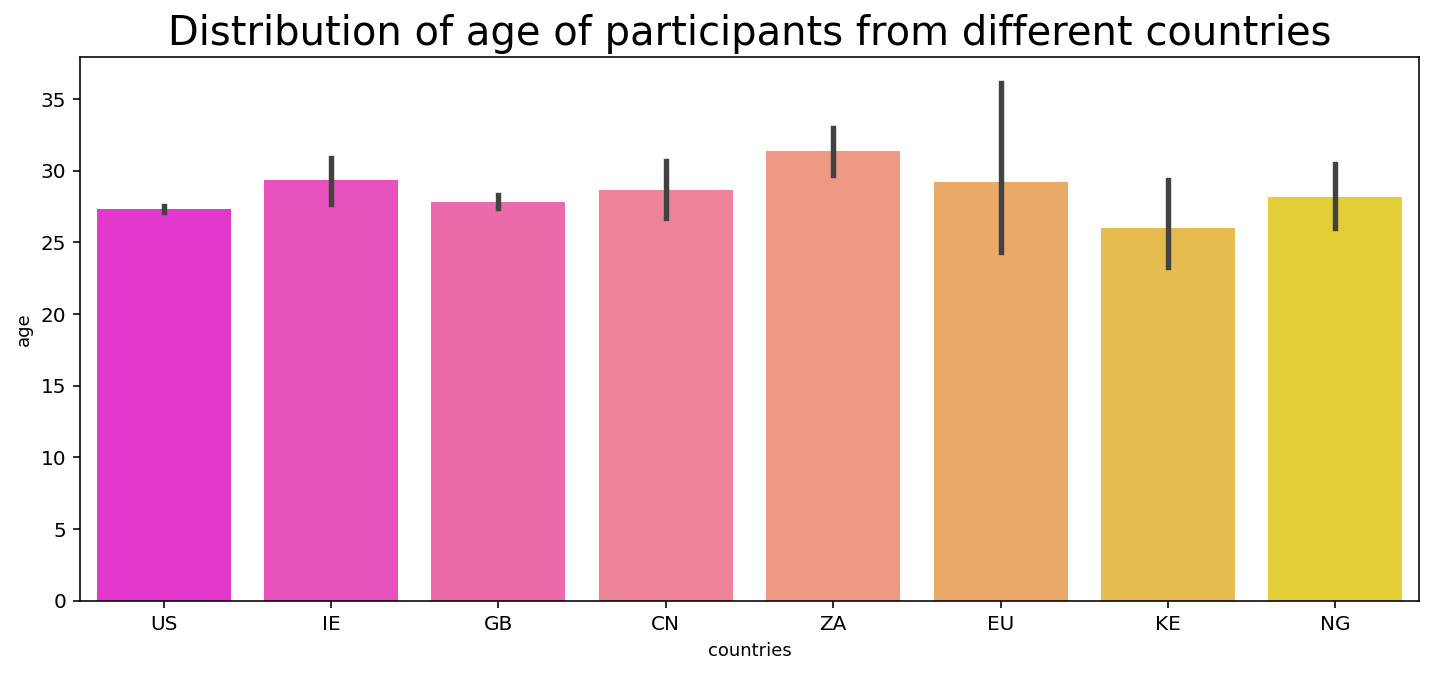

In [355]:
# Every Nations' Player and their overall scores

some_countries = ('US', 'GB', 'CN', 'EU', 'NG', 'KE','IE','ZA')
data_countries = new_df.loc[new_df['country'].isin(some_countries) & new_df['age']]

plt.rcParams['figure.figsize'] = (12, 5)
ax = sns.barplot(x = data_countries['country'], y = data_countries['age'], palette = 'spring')
ax.set_xlabel(xlabel = 'countries', fontsize = 9)
ax.set_ylabel(ylabel = 'age', fontsize = 9)
ax.set_title(label = 'Distribution of age of participants from different countries', fontsize = 20)
plt.show()

In [356]:
new_df = new_df[df.age <= 100]

/var/folders/y1/m8x8pxq10mz3x2jp60nw76l00000gn/T/ipykernel_12171/3376694988.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  new_df = new_df[df.age <= 100]


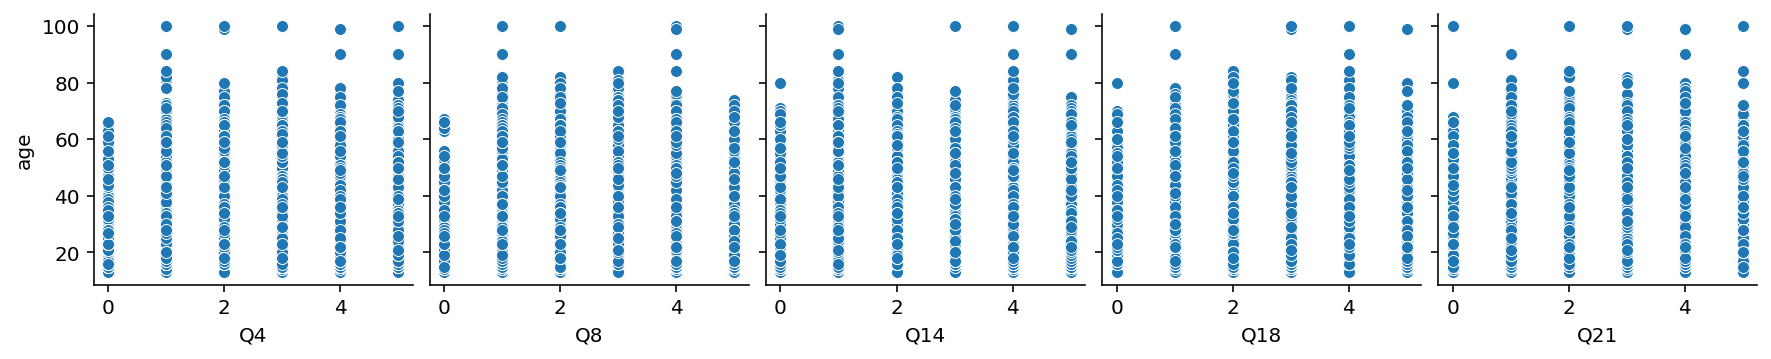

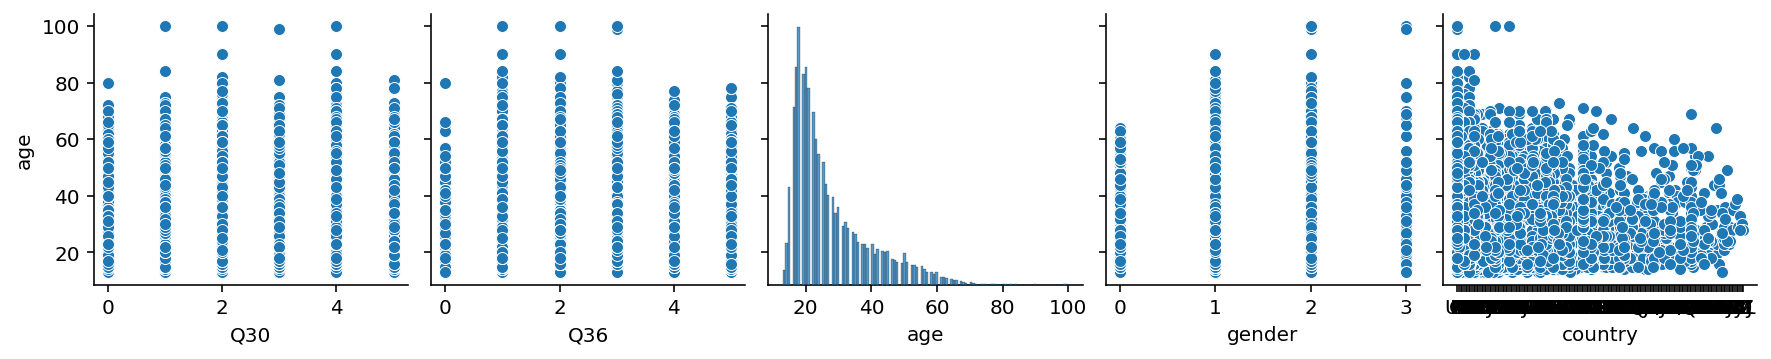

In [357]:
for i in range(0, len(new_df.columns), 5):
    sns.pairplot(data=new_df,
                x_vars=new_df.columns[i:i+5],
                y_vars=['age'])


In [358]:
# From the graph, we can see that the age graph is skewed to the right
# this could be as a result of the fact that people between the age of 20-40 are quite tech savvy 
# and can use a computer quite well.
# The majority of the graphs display a normal distribution 

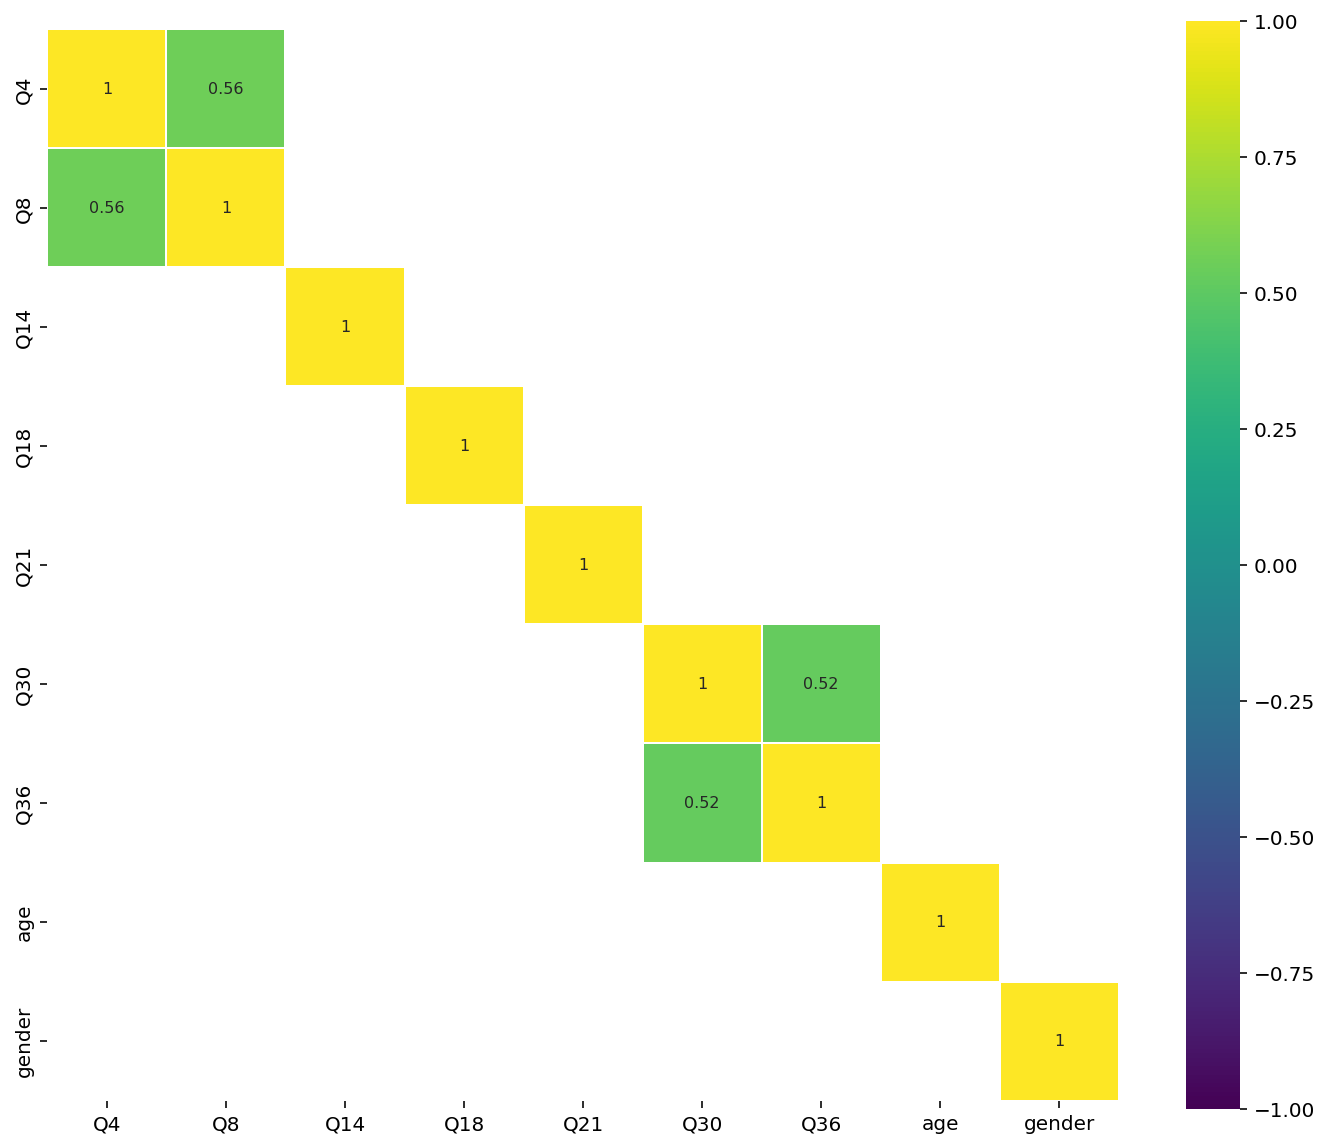

In [359]:
# This correlation map shows suggests that people who worry about their relationships also worry about losing their partner
# It also suggests that there is also a strong correlation between people who get frustrated when their partner
# is not around (30) and people who resent their partners who spend time away from them ()
corr = new_df.corr()
plt.figure(figsize=(12, 10))

sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.4)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);

(array([0, 1, 2, 3]),
 [Text(0, 0, '0'), Text(1, 0, '1'), Text(2, 0, '2'), Text(3, 0, '3')])

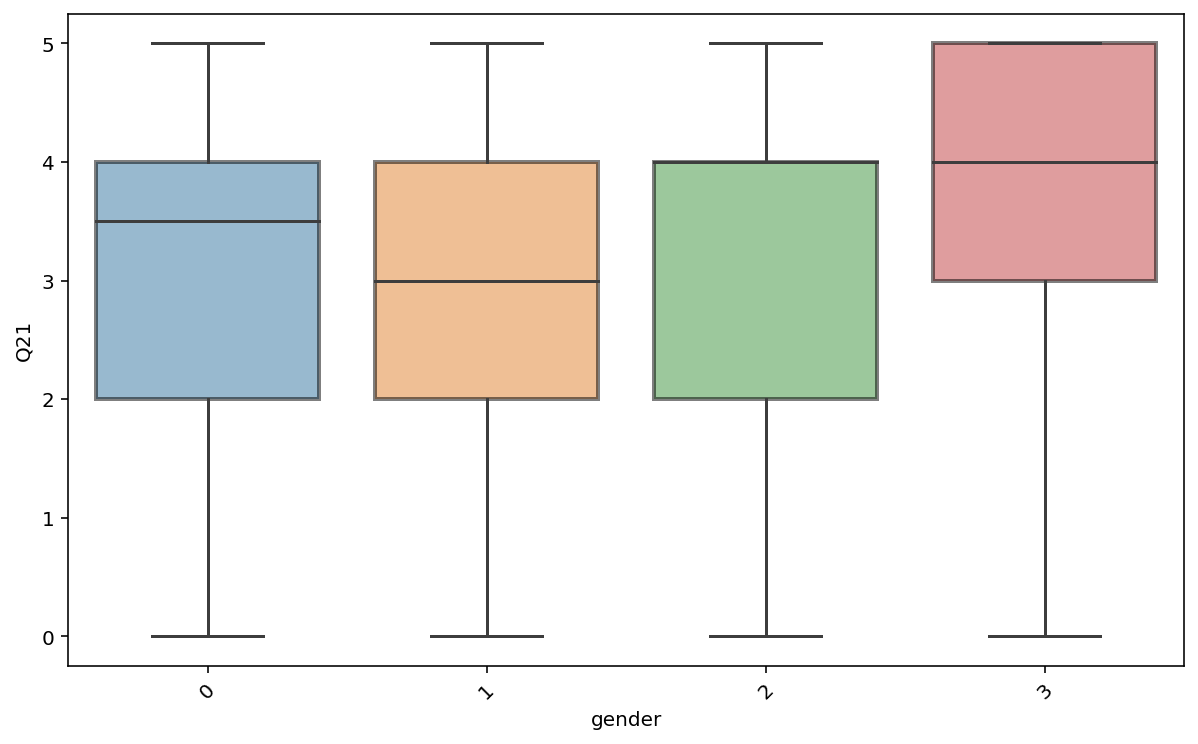

In [360]:
plt.figure(figsize = (10, 6))
ax = sns.boxplot(x='gender', y='Q21', data=new_df)
plt.setp(ax.artists, alpha=.5, linewidth=2, edgecolor="k")
plt.xticks(rotation=45)

In [361]:
# Boxplot numer 3 suggests that 75% of people with other genders find it difficult to allow themselves to depend on their 
# romantic partners

# Boxplot 1 (males) has a normal distribution whereas boxplot (0) undisclosed has apositive skewed distribution.

# The skewed distribution for gender (0) implies that more people neither agree to the fact that they find it difficult to depend on their 
# romantic partners. This could howeved be inaccurate as majority of people in the dataset were happy to disclose their genders.



# The boxplots above also indicates that males are equally distributed and will therefore tend to be generally indifferent
# so they neither agree nor disagree to the fact that they find it difficult to allow themselves to depend on their partners

# The above boxplot suggests that 50% of females do find it difficult to allow themselves to depend on their romantic
# partners.




In [362]:
sex_Q21 = new_df[['Q21', 'gender']]
sex_Q21.head(40)

,Q21,gender
0,1,2
1,1,1
2,2,1
3,5,1
4,3,1
5,5,1
6,2,1
7,2,2
8,0,2
9,5,1
